In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

2024-04-07 21:48:42.597070: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Load in the data

In [2]:
# training data
intensity = pd.read_csv("/Users/will/Documents/Documents - Mac (2)/UM/Winter24/BIOSTAT626/project/train/avg_intensity.csv")
survival_time_train = pd.read_csv("/Users/will/Documents/Documents - Mac (2)/UM/Winter24/BIOSTAT626/project/train_data.csv")
data = intensity.merge(right=survival_time_train, on="id")
data = data.drop("id", axis=1)
data.head()

X_train = data.drop('OSmonth', axis=1)  
y_train = data['OSmonth']

# testing data
X_test = pd.read_csv("/Users/will/Documents/Documents - Mac (2)/UM/Winter24/BIOSTAT626/project/test/test_intensity.csv")
X_test = X_test.drop("id",axis=1)
X_test.head()

,protein1,protein2,protein3,protein4,protein5,protein6,protein7,protein8,protein9,protein10,...,protein43,protein44,protein45,protein46,protein47,protein48,protein49,protein50,protein51,protein52
0,658.953003,2.018639,0.595981,3.702169,3.520964,4.787750,9.244649,6.777685,1.075037,0.102650,...,0.069598,0.247349,0.239061,0.981532,0.232471,3.885069,7.350449,4.953011,1.125866,0.088060
1,655.945007,1.683898,0.501137,3.104990,2.971208,4.005987,7.765568,5.679627,3.471840,0.260198,...,0.172328,1.763332,1.526460,11.091519,1.025974,3.223858,6.068185,5.116390,1.169486,0.056431
2,618.556702,1.638492,0.477895,3.019995,2.896405,3.948414,7.605892,5.561543,9.282119,0.666436,...,0.237912,1.407523,0.098724,2.044584,1.898771,4.789178,9.077495,3.394235,0.779553,0.055051
3,673.039368,1.810838,0.537660,3.321486,3.137305,4.273749,8.312483,6.095747,12.123032,0.879048,...,0.208796,1.937908,1.318403,49.091938,1.381375,4.331512,8.246289,5.511511,1.250469,0.058408
4,660.084839,1.564457,0.452385,2.880154,2.755414,3.716102,7.237874,5.289649,22.461992,1.635484,...,0.253268,4.993976,0.230116,23.552458,2.807543,4.547091,8.637622,5.097084,1.160920,0.063801


### Plot histogram of outcome training values

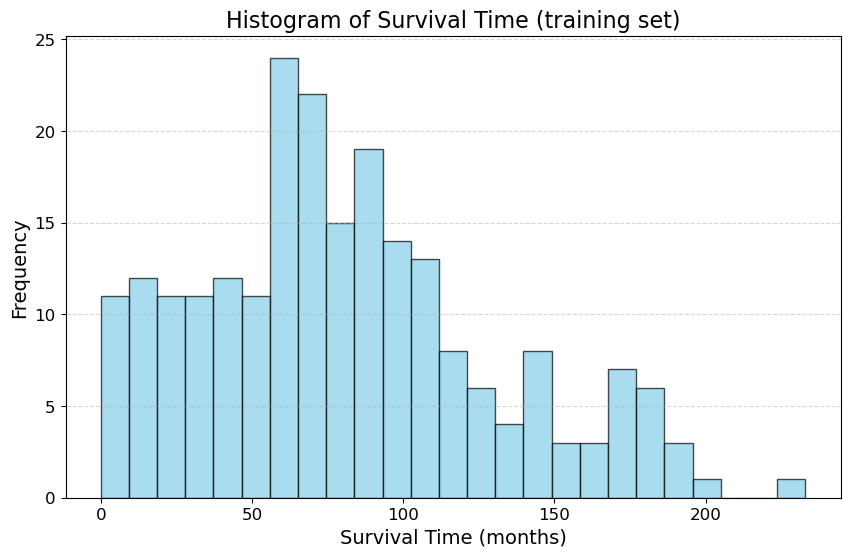

In [3]:
# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(y_train, bins=25, color='skyblue', edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Histogram of Survival Time (training set)', fontsize=16)
plt.xlabel('Survival Time (months)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Customize ticks and grid
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show plot
plt.show()

### Plot correlation matrix


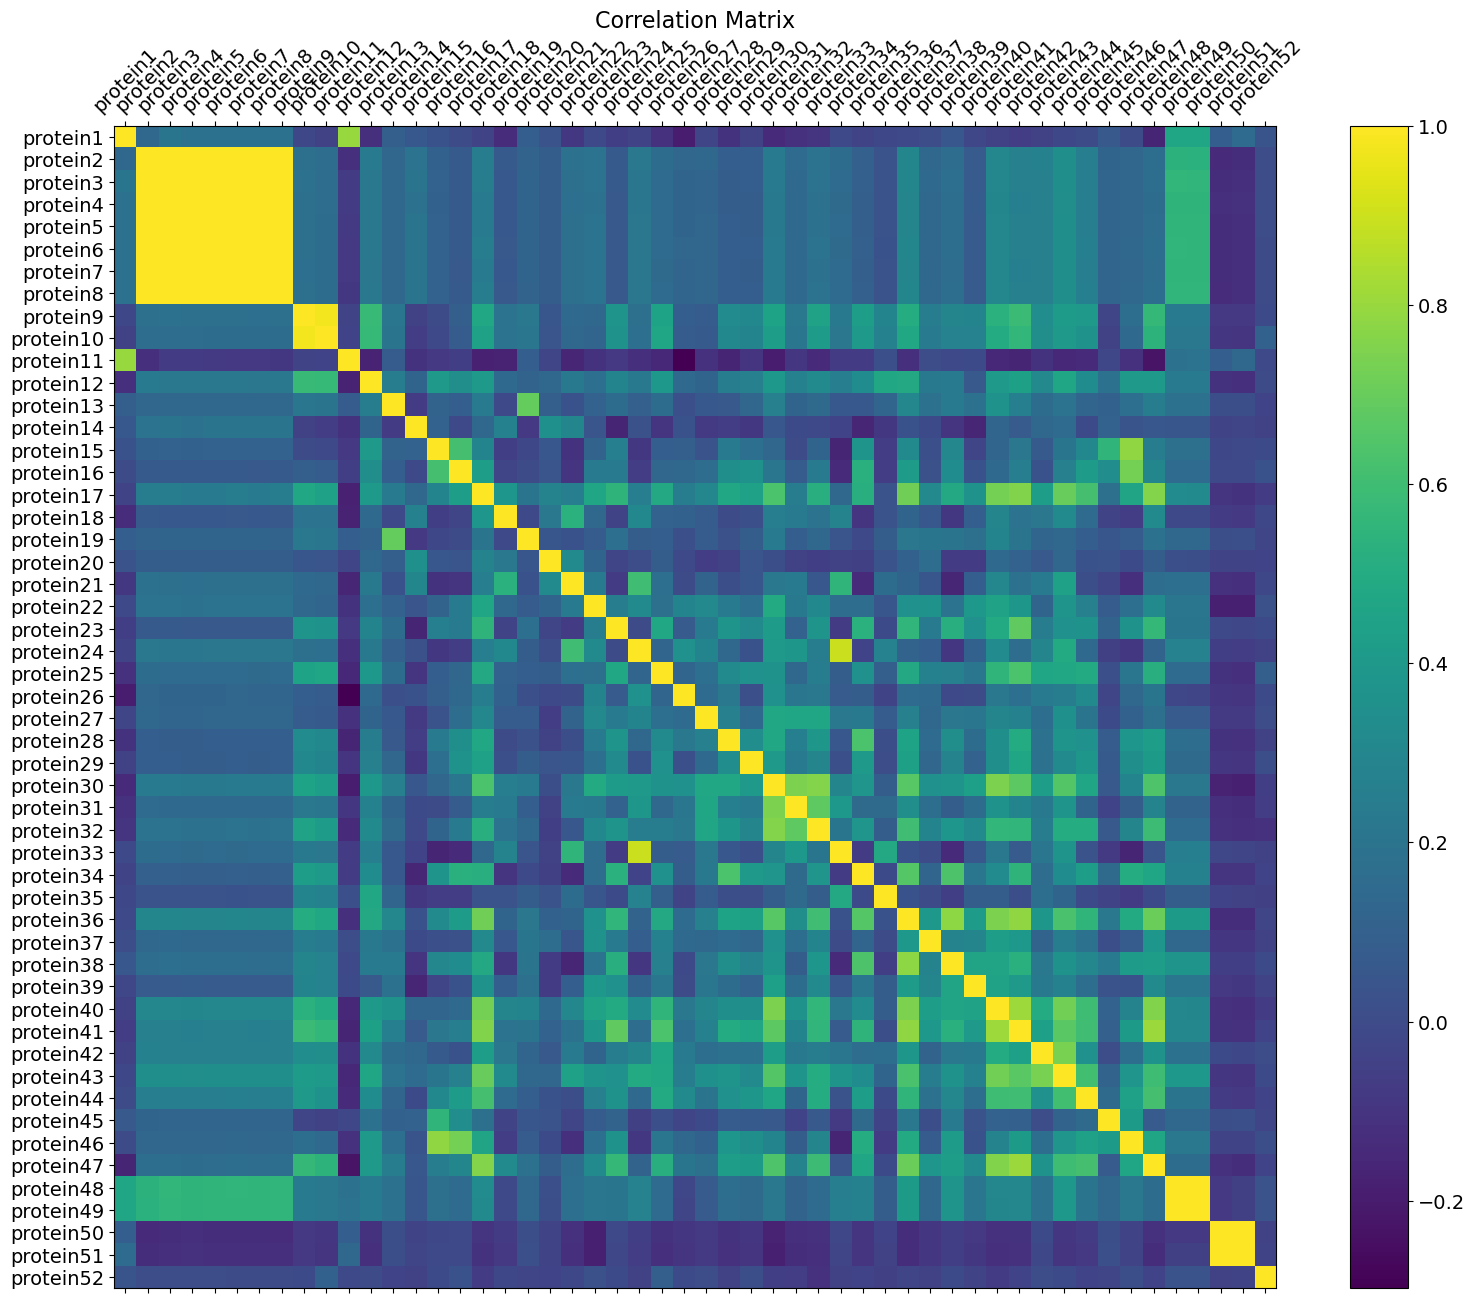

In [4]:
f = plt.figure(figsize=(19, 15))
plt.matshow(X_train.corr(), fignum=f.number)
plt.xticks(range(X_train.select_dtypes(['number']).shape[1]), X_train.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(X_train.select_dtypes(['number']).shape[1]), X_train.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

### Train the model 

In [6]:
n_proteins = 52

# Define the neural network model
model = Sequential()
model.add(Dense(64, input_dim=n_proteins, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

# train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)
history

Epoch 1/100
6/6 [==============================] - 1s 81ms/step - loss: 3313.7539 - mean_absolute_error: 43.5733 - val_loss: 4249.9453 - val_mean_absolute_error: 57.6133
Epoch 2/100
6/6 [==============================] - 0s 7ms/step - loss: 2725.1462 - mean_absolute_error: 45.2207 - val_loss: 4320.2412 - val_mean_absolute_error: 58.3266
Epoch 3/100
6/6 [==============================] - 0s 8ms/step - loss: 2404.8213 - mean_absolute_error: 40.9685 - val_loss: 3816.0750 - val_mean_absolute_error: 50.7866
Epoch 4/100
6/6 [==============================] - 0s 8ms/step - loss: 2493.0286 - mean_absolute_error: 38.5812 - val_loss: 3811.0244 - val_mean_absolute_error: 48.8215
Epoch 5/100
6/6 [==============================] - 0s 8ms/step - loss: 2433.5049 - mean_absolute_error: 38.3036 - val_loss: 3907.0737 - val_mean_absolute_error: 53.0829
Epoch 6/100
6/6 [==============================] - 0s 9ms/step - loss: 2385.1626 - mean_absolute_error: 40.2482 - val_loss: 4014.5964 - val_mean_absolute_

### Evaluate model

In [ ]:
loss, mae = model.evaluate(X_train, y_train)
print("Mean Absolute Error:", mae)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(predictions, bins=25, color='skyblue', edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Histogram of Survival Time (training set)', fontsize=16)
plt.xlabel('Survival Time (months)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Customize ticks and grid
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show plot
plt.show()

## Hyperparameter Tuning / Grid Search

In [ ]:
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=52, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
    return model

# Wrap Keras model so it can be used by scikit-learn
model = KerasRegressor(build_fn=create_model, verbose=0)

param_grid = {
    'epochs': [50, 100, 150],  # Number of epochs to train the model
    'batch_size': [32, 64, 128]  # Batch size used during training
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
